In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weirdids = [356427, 365141, 383739, 385230, 385343, 387913, 388958, 389486, 390669, 392084, 394566, 395868, 396624, 397062, 397148, 397204, 397889, 398622, 400733, 401663]
goodids = [348189, 361428, 368428, 383612, 388303, 392544, 394155, 394942, 396789, 400179, 401705, 402841, 404964, 405300] # controls     

104321
114167


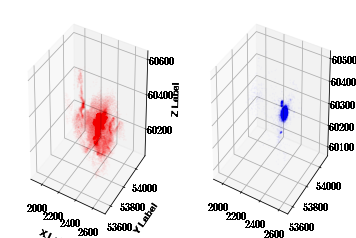

In [3]:
id  = weirdids[0]
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
gas = np.loadtxt('../data/M31analog_%s_gas_properties.txt'%id)
print len(gas)
x = gas[:,0]
y = gas[:,1]
z = gas[:,2]

stars = np.loadtxt('../data/M31analog_%s_star_properties.txt'%id)
print len(stars)
x2= stars[:,0]
y2 = stars[:,1]
z2 = stars[:,2]

ax.scatter(x,y,z, c='r', marker='o', alpha=1e-2, s=.75)
ax2.scatter(x2,y2,z2, c='b', marker='^',alpha=1e-2, s=.75)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
    #plt.savefig('%s_3D_particles.pdf'%int(id))
    


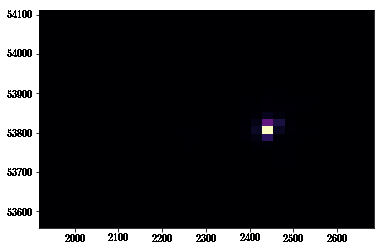

In [ ]:
plt.hist2d(x, y, bins=(30, 30), cmap=plt.cm.magma)
plt.show()

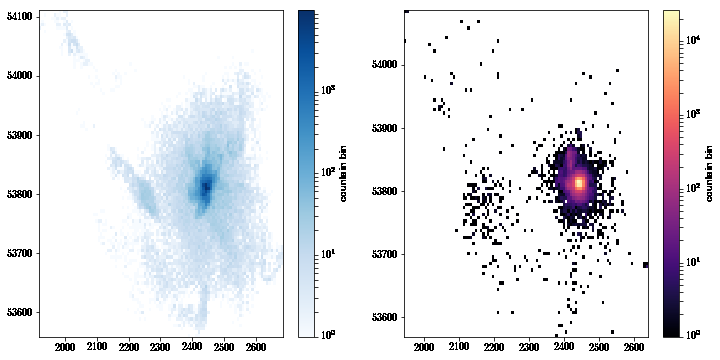

In [33]:
import matplotlib
plt.clf()
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist2d(x, y, bins=100, cmap='Blues',norm=matplotlib.colors.LogNorm())
cb = plt.colorbar()
cb.set_label('counts in bin')

plt.subplot(122)
plt.hist2d(x2, y2, bins=100, cmap='magma',norm=matplotlib.colors.LogNorm())
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.savefig('%s_3d_particles.png'%int(id))
plt.show()

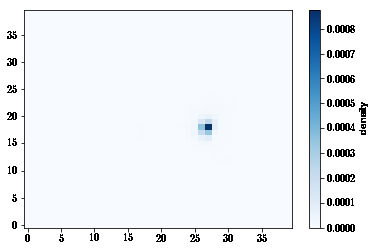

In [18]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(np.min(x), np.max(x), 40)
ygrid = np.linspace(np.min(y), np.max(y), 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")
plt.show()